In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",
                 parse_dates=True,
                 index_col=0)

In [47]:
df.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789


In [48]:
df.skew() # Asimetría

,0
CO,1.063310
NO,1.265967
NO2,0.773803
NOX,0.977845
O3,0.374217
PM10,0.559250
PM25,1.302965
SO2,2.802113


In [49]:
df.kurt()

,0
CO,1.683262
NO,2.462188
NO2,1.428723
NOX,1.776258
O3,0.038129
PM10,0.314006
PM25,5.184911
SO2,10.735611


<Axes: ylabel='Count'>

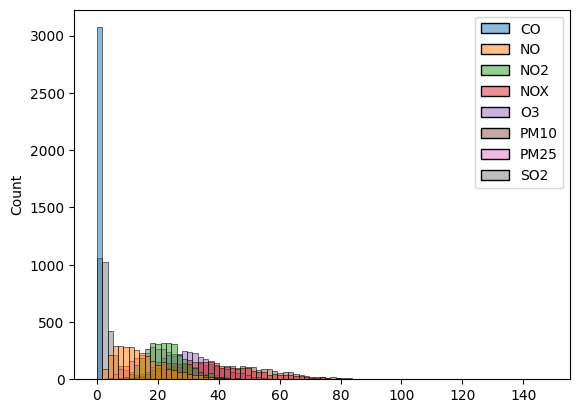

In [50]:
sns.histplot(df)

<Axes: xlabel='CO', ylabel='Count'>

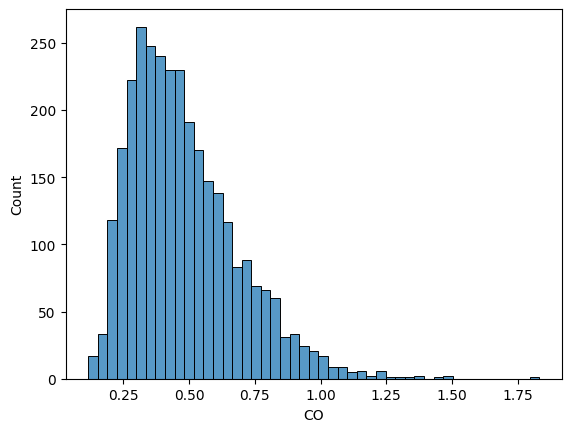

In [51]:
sns.histplot(df['CO'])

<Axes: xlabel='CO', ylabel='Count'>

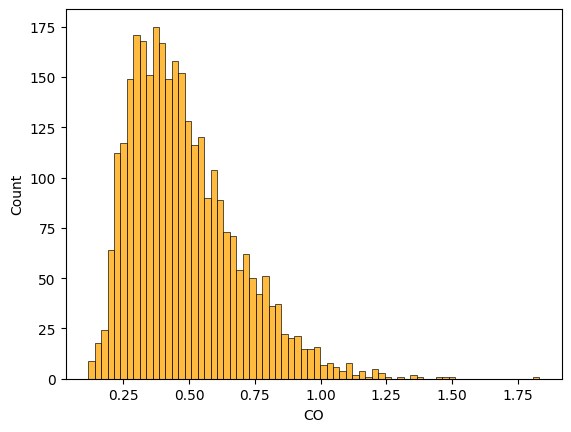

In [52]:
sns.histplot(df['CO'], bins=70, color='orange')

<Axes: xlabel='SO2', ylabel='Count'>

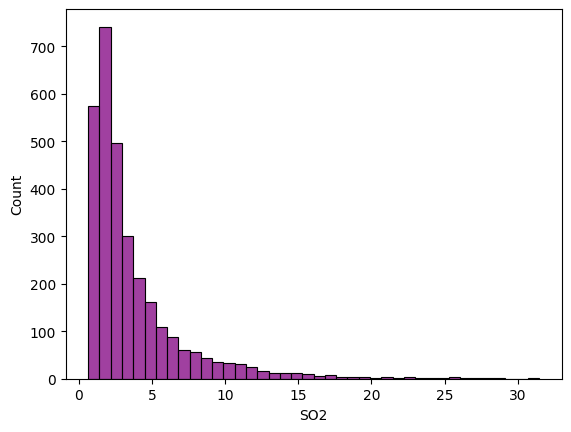

In [53]:
sns.histplot(df['SO2'], bins=40, color='purple')

In [54]:
from scipy.stats import shapiro

In [55]:
estadistico, p_value = shapiro(df['CO'])
print('estadistico= %.3f , p_value = %.3f]' % (estadistico, p_value))

estadistico= 0.938 , p_value = 0.000]


In [56]:
A = [35, 23, 47, 17, 10, 43, 9, 6, 28]
B = [30, 33, 45, 23, 8, 49, 12, 4, 31]
A = sorted(A, reverse=True)
B = sorted(B, reverse=True)

In [57]:
A

[47, 43, 35, 28, 23, 17, 10, 9, 6]

In [58]:
B

[49, 45, 33, 31, 30, 23, 12, 8, 4]

In [59]:
correlacion_matrix = df.corr('spearman')

In [60]:
correlacion_matrix

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
CO,1.000000,0.792279,0.844874,0.854311,-0.057146,0.525460,0.540627,0.377411
NO,0.792279,1.000000,0.801656,0.959736,-0.213371,0.539598,0.402232,0.328189
NO2,0.844874,0.801656,1.000000,0.932275,0.064124,0.695687,0.693741,0.476221
NOX,0.854311,0.959736,0.932275,1.000000,-0.088925,0.646696,0.560590,0.411711
O3,-0.057146,-0.213371,0.064124,-0.088925,1.000000,0.408806,0.462961,0.093813
PM10,0.525460,0.539598,0.695687,0.646696,0.408806,1.000000,0.858762,0.548739
PM25,0.540627,0.402232,0.693741,0.560590,0.462961,0.858762,1.000000,0.547311
SO2,0.377411,0.328189,0.476221,0.411711,0.093813,0.548739,0.547311,1.000000


<Axes: >

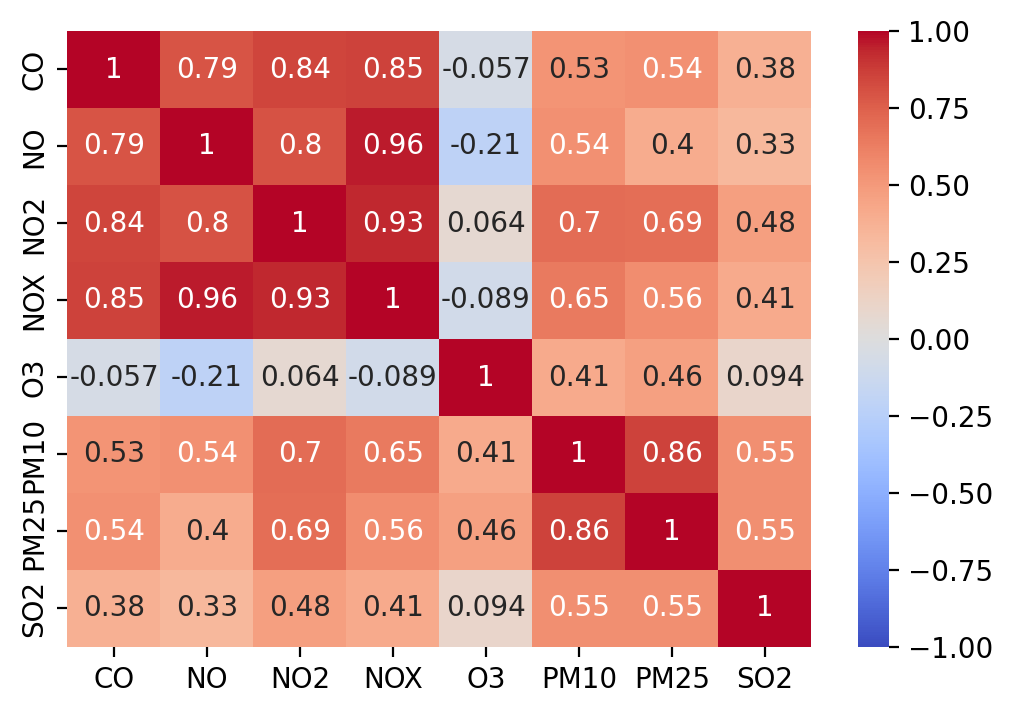

In [61]:
plt.figure(figsize=(6,4),dpi=200)
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1,center=0)

In [32]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [62]:
import pingouin as pg

In [63]:
corr = pg.pairwise_corr(df, method='spearman')

In [64]:
corr

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,CO,NO,spearman,two-sided,3073,0.792279,"[0.78, 0.81]",0.000000e+00,1.000000
1,CO,NO2,spearman,two-sided,3073,0.844874,"[0.83, 0.85]",0.000000e+00,1.000000
2,CO,NOX,spearman,two-sided,3073,0.854311,"[0.84, 0.86]",0.000000e+00,1.000000
3,CO,O3,spearman,two-sided,3073,-0.057146,"[-0.09, -0.02]",1.528766e-03,0.886914
4,CO,PM10,spearman,two-sided,3073,0.525460,"[0.5, 0.55]",9.243138e-218,1.000000
5,CO,PM25,spearman,two-sided,3073,0.540627,"[0.52, 0.57]",7.760858e-233,1.000000
6,CO,SO2,spearman,two-sided,3073,0.377411,"[0.35, 0.41]",1.285592e-104,1.000000
7,NO,NO2,spearman,two-sided,3073,0.801656,"[0.79, 0.81]",0.000000e+00,1.000000
8,NO,NOX,spearman,two-sided,3073,0.959736,"[0.96, 0.96]",0.000000e+00,1.000000
9,NO,O3,spearman,two-sided,3073,-0.213371,"[-0.25, -0.18]",5.664174e-33,1.000000


In [65]:
corr.sort_values(by='r', ascending=False)[['X', 'Y', 'r']]

,X,Y,r
8,NO,NOX,0.959736
13,NO2,NOX,0.932275
25,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
7,NO,NO2,0.801656
0,CO,NO,0.792279
15,NO2,PM10,0.695687
16,NO2,PM25,0.693741
19,NOX,PM10,0.646696


In [66]:
c = corr.sort_values(by='r', ascending=False)[['X', 'Y', 'r']]

In [67]:
c = c[(c['r']>0.5) | (c['r']<-0.5)] # c=c[(c['r']>0.5) | (c['r']<-0.5)]

In [68]:
c

,X,Y,r
8,NO,NOX,0.959736
13,NO2,NOX,0.932275
25,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
7,NO,NO2,0.801656
0,CO,NO,0.792279
15,NO2,PM10,0.695687
16,NO2,PM25,0.693741
19,NOX,PM10,0.646696


In [69]:
df2 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv",
                 parse_dates=True,
                 index_col=0)


In [70]:
df2.head()

,RH,TMP,WDR,WSP
fecha,,,,
2015-01-01,60.565476,13.385714,156.723039,1.933333
2015-01-02,52.452381,13.567262,176.710784,2.559804
2015-01-03,55.763636,13.893333,190.830846,2.136318
2015-01-04,62.776786,12.536012,196.306373,2.592647
2015-01-05,70.271845,9.070227,266.889764,2.963517


In [71]:
estadistico, p_value = shapiro(df2['RH'])
print('estadistico= %.3f , p_value = %.3f]' % (estadistico, p_value))

estadistico= 0.985 , p_value = 0.000]


In [74]:
cm = pd.concat([df, df2], axis=1)

In [75]:
cm

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,RH,TMP,WDR,WSP
fecha,,,,,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,60.565476,13.385714,156.723039,1.933333
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,52.452381,13.567262,176.710784,2.559804
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,55.763636,13.893333,190.830846,2.136318
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,62.776786,12.536012,196.306373,2.592647
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,51.899130,19.453565,190.198664,2.187646
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,59.949565,17.375826,183.542571,2.092154
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,58.837743,17.039153,169.527919,1.952284


<Axes: >

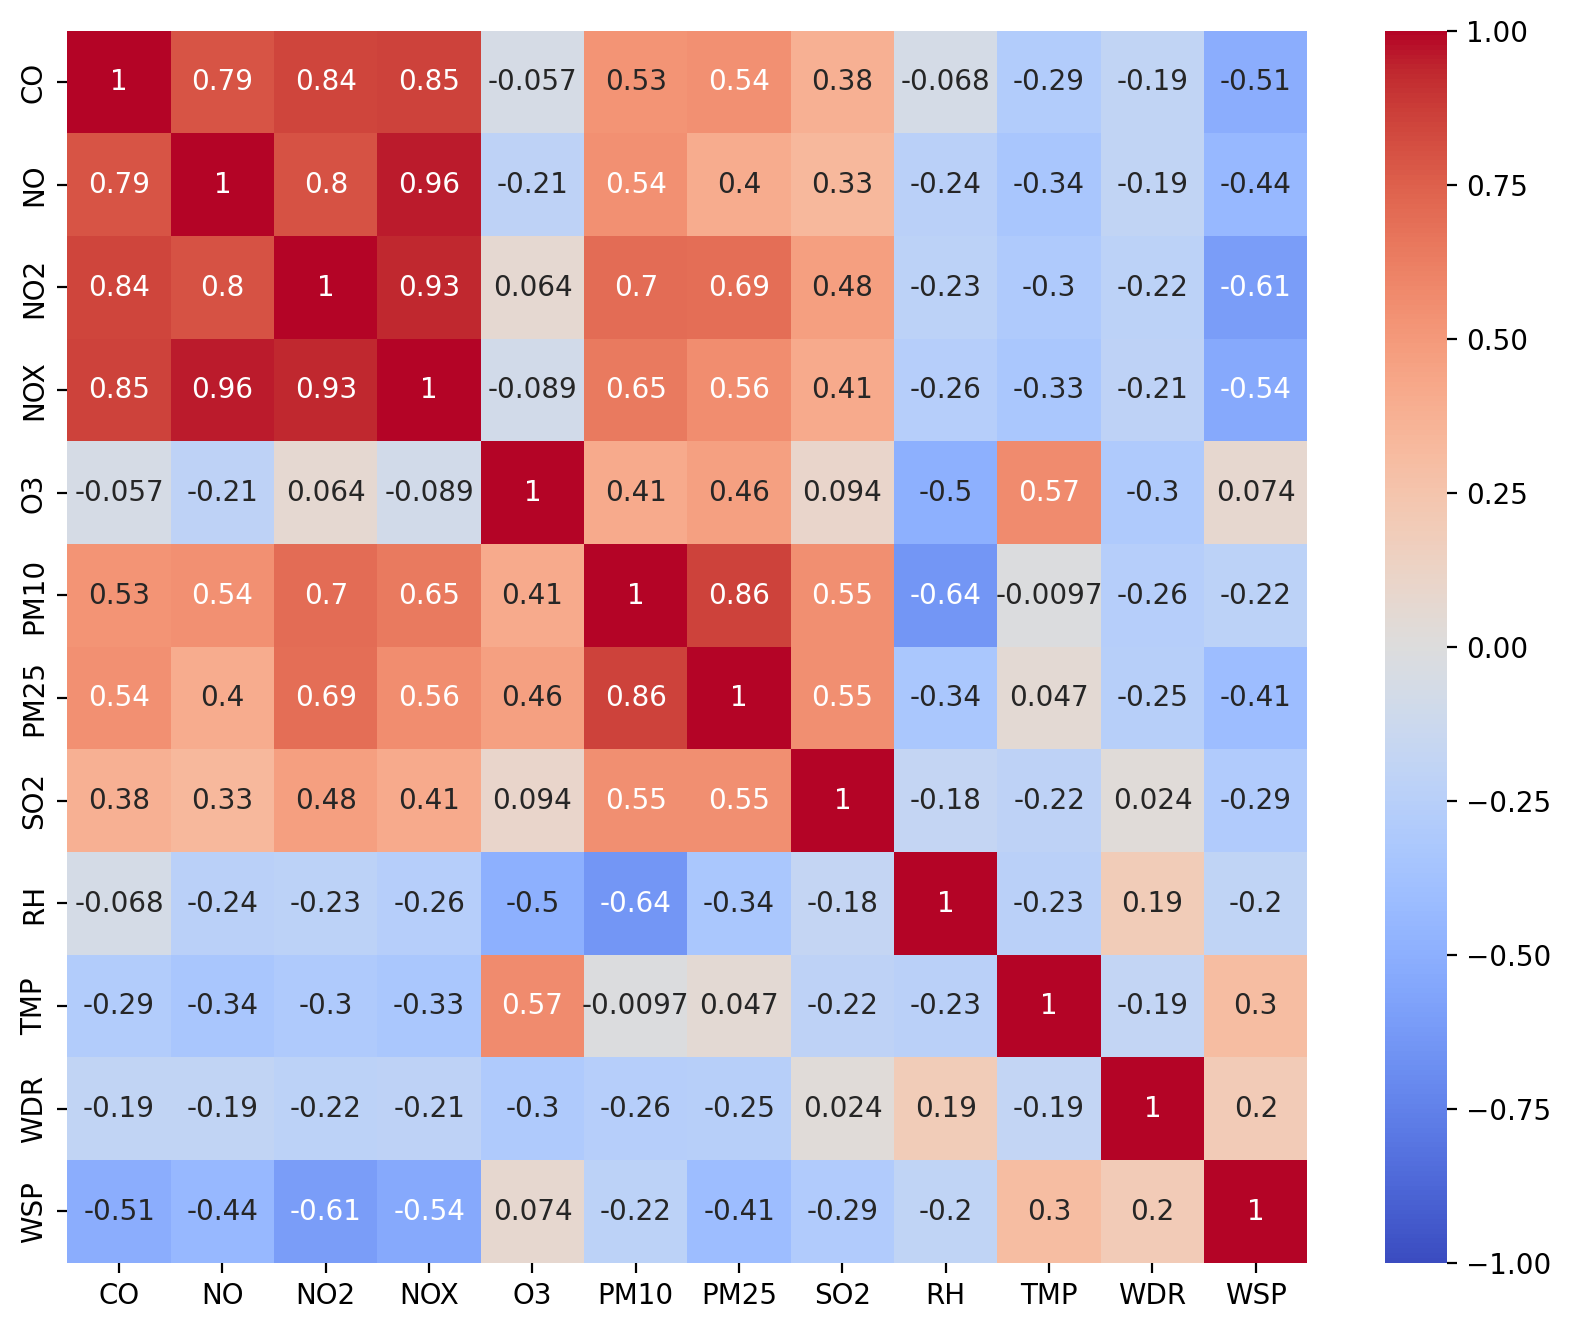

In [79]:
correlacion_matrix = cm.corr('spearman')
plt.figure(figsize=(10,8),dpi=200)
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1,center=0)

In [82]:
corr = pg.pairwise_corr(cm, method='spearman')
corr.sort_values(by='r', ascending=False)[['X', 'Y', 'r']]
c = corr.sort_values(by='r', ascending=False)[['X', 'Y', 'r']]

In [83]:
c = c[(c['r']>0.5) | (c['r']<-0.5)] # c=c[(c['r']>0.5) | (c['r']<-0.5)]

In [84]:
c


,X,Y,r
12,NO,NOX,0.959736
21,NO2,NOX,0.932275
45,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
11,NO,NO2,0.801656
0,CO,NO,0.792279
23,NO2,PM10,0.695687
24,NO2,PM25,0.693741
31,NOX,PM10,0.646696


In [ ]:
sns.scatterplot(x='NO', y='')

In [85]:
sns.pairplot(cm)

Output hidden; open in https://colab.research.google.com to view.